<a href="https://colab.research.google.com/github/drishyatv/CAR_price_prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading and Preprocessing
Goal: Clean and prepare the data for modeling.

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np

# Load the dataset

df = pd.read_csv(r'C:\Users\ANJ\Downloads\CarPrice_Assignment.csv')

# Display structure and missing values

print(df.info())
print(df.isnull().sum())

# Extract Car Brand from CarName

df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Correct spelling errors in brand names

df['CarBrand'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen',
    'porcshce': 'porsche', 'maxda': 'mazda',
    'toyouta': 'toyota'
}, inplace=True)

# Drop unnecessary columns

df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# One-hot encode categorical columns

categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features and target

X = df.drop('price', axis=1)
y = df['price']

# Scale features (for SVR especially)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

C:\Users\ANJ\AppData\Local\Temp\ipykernel_15232\3233656496.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({



Step 2: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



Step 3: Model Implementation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} has been trained successfully.")


Linear Regression has been trained successfully.
Decision Tree has been trained successfully.
Random Forest has been trained successfully.
Gradient Boosting has been trained successfully.
SVR has been trained successfully.



Step 4: Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    })

# Display performance
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


               Model  R2 Score           MSE          MAE
2      Random Forest  0.958267  3.294575e+06  1293.233793
3  Gradient Boosting  0.924181  5.985429e+06  1710.336389
0  Linear Regression  0.910162  7.092188e+06  1760.870731
1      Decision Tree  0.906907  7.349134e+06  1782.589439
4                SVR -0.100615  8.688696e+07  5701.535525




Step 5: Feature Importance Analysis

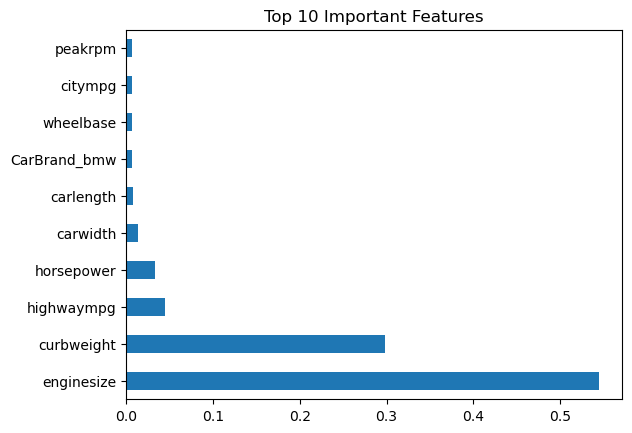

In [ ]:
# Use Random Forest for feature importance
import matplotlib.pyplot as plt

rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot top 10 features
feat_imp = pd.Series(importances, index=feature_names)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()




Step 6: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Tuned R2 Score:", r2_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Tuned R2 Score: 0.9594648507194989


In [ ]:
best_model = models['Random Forest']


In [ ]:
# Use the first row of X_test
sample = X_test[0].reshape(1, -1)

# Predict price
predicted_price = best_model.predict(sample)
print("Predicted Price:", predicted_price[0])


Predicted Price: 35519.545
